In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import math

In [21]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\Anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    folium-0.10.0              |             py_1          59 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.3.1-py_0
  folium             conda-forge/noarch::folium-0.10.0-py_1
  vincent          

In [22]:
import folium

In [3]:
path = "C:/Users/user/Desktop/HASADNA/involved_markers_hebrew.csv"
print(path)

C:/Users/user/Desktop/HASADNA/involved_markers_hebrew.csv


In [4]:
df = pd.read_csv(path)
print(df.shape)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1678965, 136)


In [5]:
cols = ['accident_id','longitude','latitude','x','y','injury_severity', 'sex',
           'age_group', 'home_region','day_night','day_in_week',
          'accident_district','accident_natural_area','accident_yishuv_shape',
           'street1','street1_hebrew','street2','street2_hebrew','accident_year',
          'accident_month','accident_day','accident_hour',
          'location_accuracy','road_type','cross_mode','cross_location','accident_severity']

In [6]:
tlvfrom2015 = df.loc[(df.accident_year >= 2015) & (df.involved_type == 3)
                          & (df.longitude < 34.81) & (df.latitude > 32.03)][cols]
tlvfrom2015.location_accuracy.value_counts(dropna=False)
tlvfrom2015[tlvfrom2015.location_accuracy == 1].accident_severity.value_counts(dropna=False)

3    4401
2     376
1      58
Name: accident_severity, dtype: int64

In [10]:
X = tlvfrom2015[tlvfrom2015.location_accuracy == 1][['accident_id','x','y','longitude','latitude']]
print('dimension of the matrix is: ',X.shape)
X.drop_duplicates(subset = 'accident_id',keep = 'first', inplace = True)
print('dimension of the matrix after filtering duplicates is: ',X.shape)

dimension of the matrix is:  (4835, 5)
dimension of the matrix after filtering duplicates is:  (4154, 5)


In [11]:
db = DBSCAN(eps=50, min_samples=2).fit(X[['x','y']].values)
unique_elements, counts_elements = np.unique(db.labels_, return_counts=True)
print(db)

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)


In [23]:
m = folium.Map(location=[32.09, 34.78], zoom_start=15)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)

In [24]:
colors = ['#7FFF00','#FFFF00','#FF8C00','#FF0000']

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X[['longitude','latitude']].values[class_member_mask]
    radius = 3
    cluster_size = len(xy)

    if k == -1 or (cluster_size <= 6):
      # Black used for noise.
      col='#000000'
      radius = 1
    else:
      col = colors[min([cluster_size - 7,3])]

    for row in xy:
        folium.CircleMarker(location = [row[1], row[0]],radius=radius,color=col,
                            fill_color=col,fill_opacity=0.7).add_to(m)


severe = tlvfrom2015[(tlvfrom2015.location_accuracy == 1) &
                          (tlvfrom2015.accident_severity == 1)]
medium = tlvfrom2015[(tlvfrom2015.location_accuracy == 1) &
                          (tlvfrom2015.accident_severity == 2)]

# show map:
m

In [62]:
def estimate_eps(eps_tested = 50,X=X):
    db = DBSCAN(eps=eps_tested, min_samples=6).fit(X[['x','y']].values)

    data2plot = X.iloc[(db.labels_ != -1) ,]
    colors = db.labels_[db.labels_ != -1]
    #test = pd.concat([data2plot,pd.DataFrame(db.labels_[db.labels_ != -1])])

    plt.scatter(data2plot.x,data2plot.y,c=colors,s=1,cmap='tab20')
    plt.title(label="eps = {0}\nMinimal cluster size is {1}".format(eps_tested,6))
    return db

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

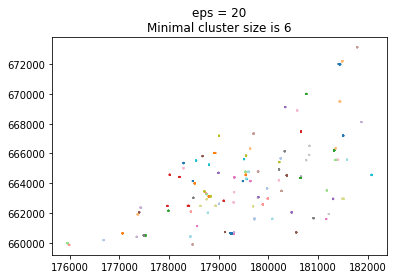

In [63]:
plt.figure()
estimate_eps(20,X)

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

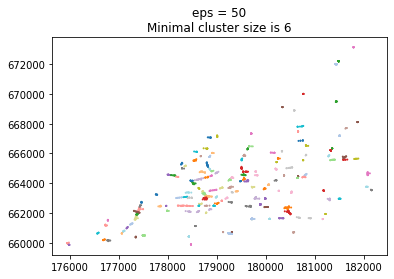

In [65]:
plt.figure()
estimate_eps(50,X)

DBSCAN(algorithm='auto', eps=75, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

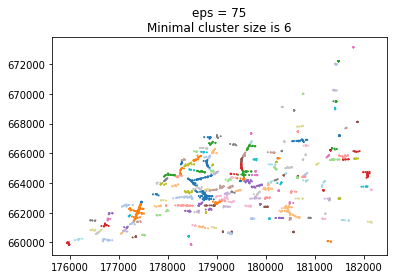

In [64]:
plt.figure()
estimate_eps(75,X)

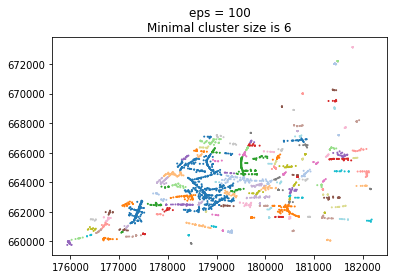

In [59]:
plt.figure()
estimate_eps(100,X)

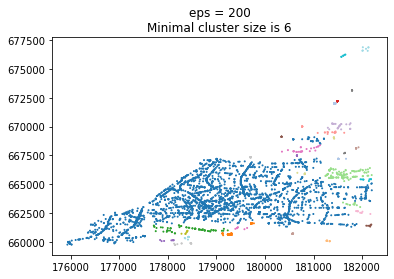

In [60]:
plt.figure()
estimate_eps(200,X)

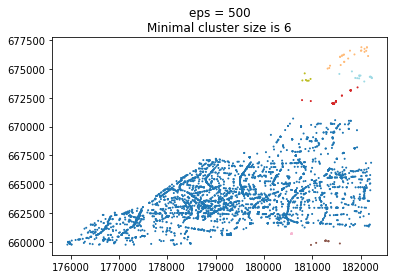

In [61]:
plt.figure()
estimate_eps(500,X)